In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Exploratory Data Analysis

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

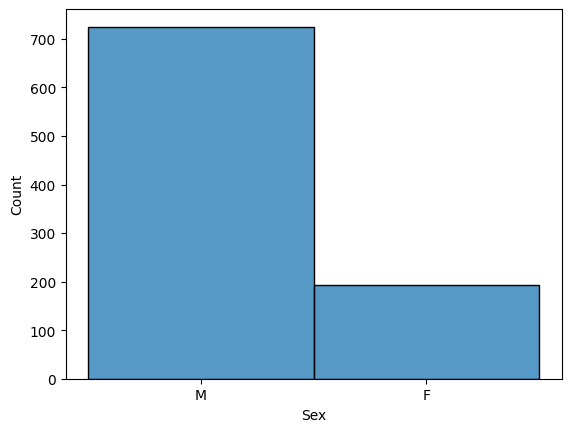

In [ ]:
sns.histplot(df['Sex'])

<Axes: xlabel='Age', ylabel='Count'>

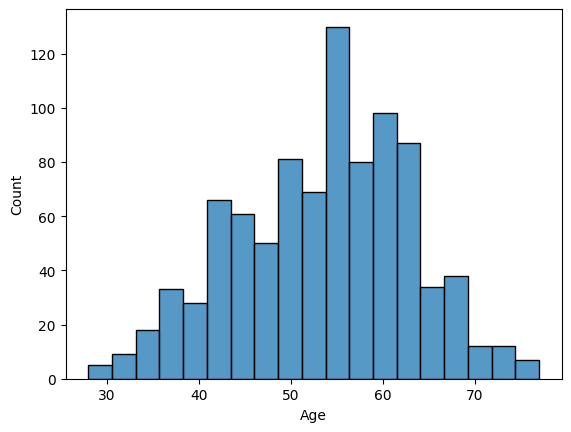

In [ ]:
sns.histplot(df['Age'])

In [ ]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='Count'>

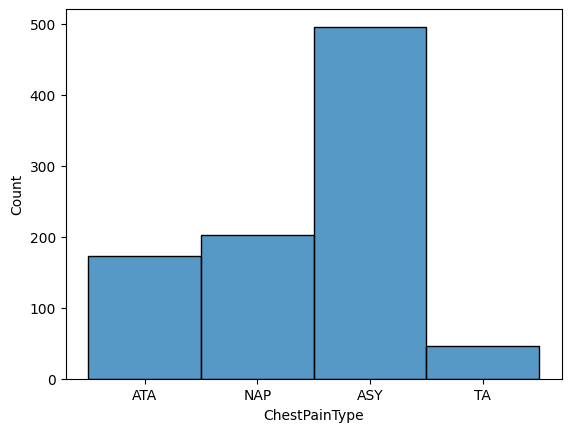

In [ ]:
sns.histplot(df['ChestPainType'])

<Axes: xlabel='RestingBP', ylabel='Count'>

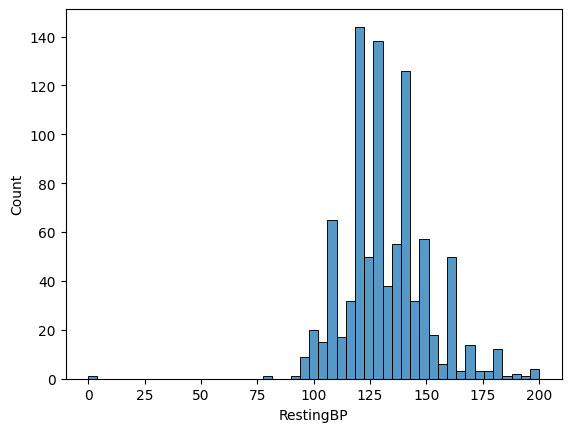

In [ ]:
sns.histplot(df['RestingBP'])

<Axes: xlabel='Cholesterol', ylabel='Count'>

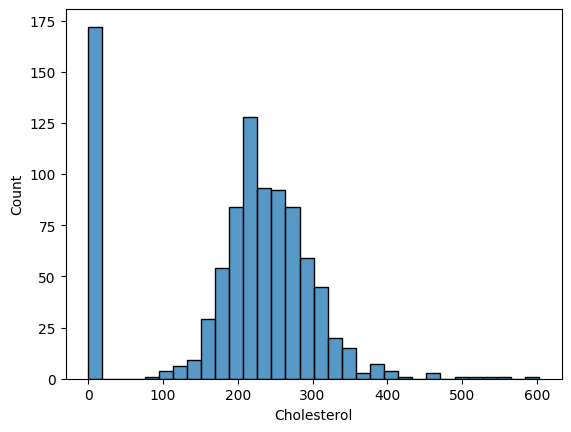

In [ ]:
sns.histplot(df['Cholesterol'])

In [ ]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

<Axes: xlabel='FastingBS', ylabel='Count'>

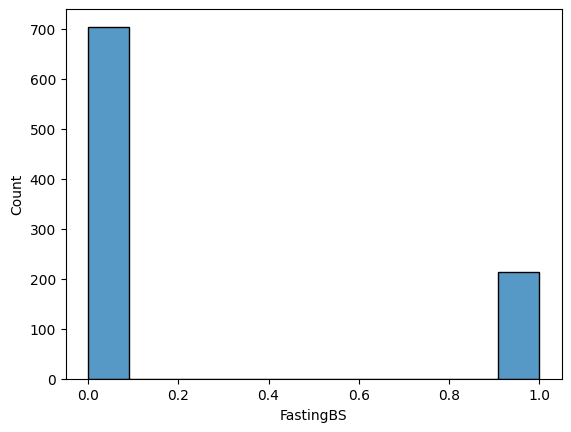

In [ ]:
sns.histplot(df['FastingBS'])

In [ ]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<Axes: xlabel='RestingECG', ylabel='Count'>

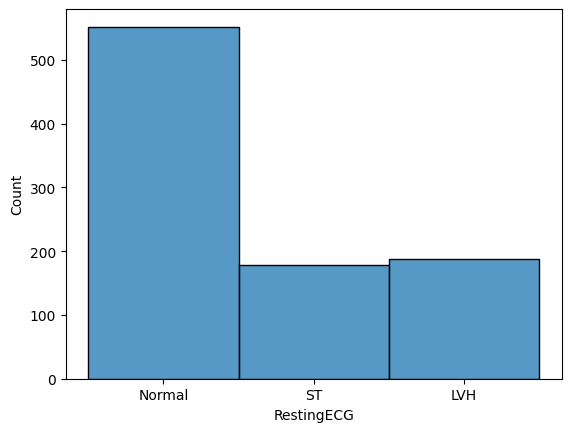

In [ ]:
sns.histplot(df['RestingECG'])

<Axes: xlabel='MaxHR', ylabel='Count'>

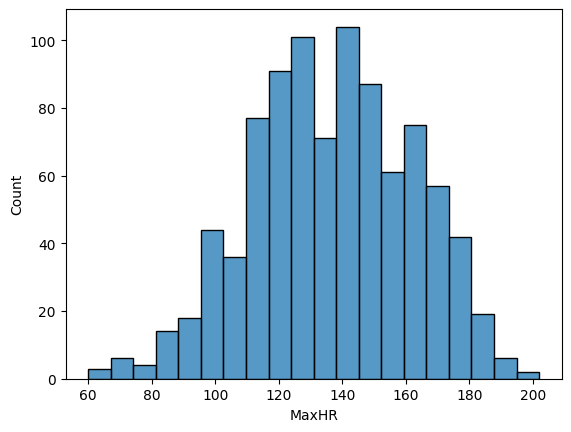

In [ ]:
sns.histplot(df['MaxHR'])

<Axes: xlabel='ExerciseAngina', ylabel='Count'>

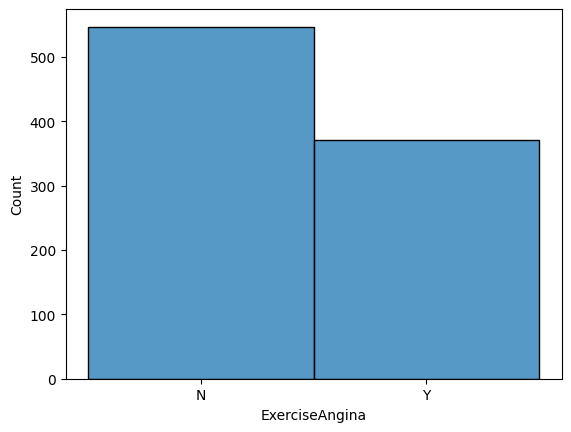

In [ ]:
sns.histplot(df['ExerciseAngina'])

<Axes: xlabel='Oldpeak', ylabel='Count'>

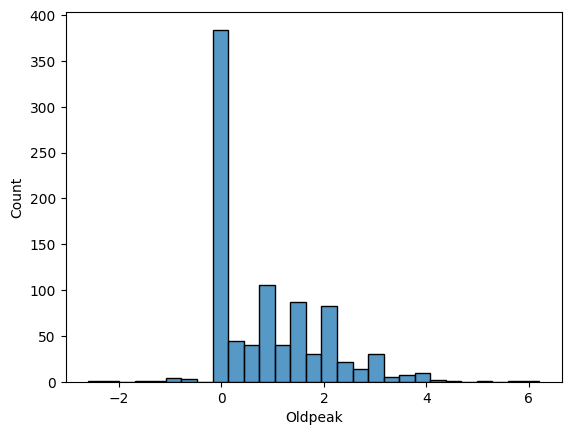

In [ ]:
sns.histplot(df['Oldpeak'])

<Axes: xlabel='ST_Slope', ylabel='Count'>

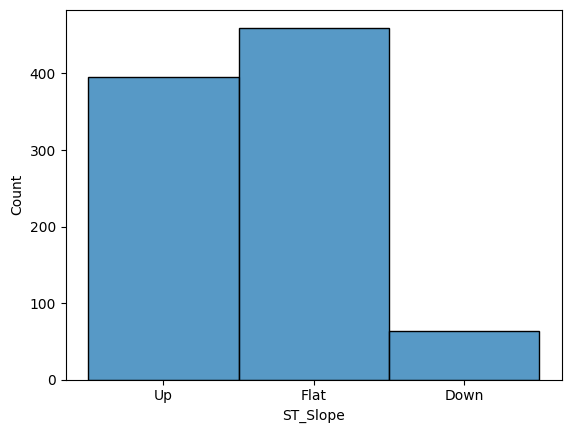

In [ ]:
sns.histplot(df['ST_Slope'])

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

## Handling Outliers

<Axes: xlabel='Age'>

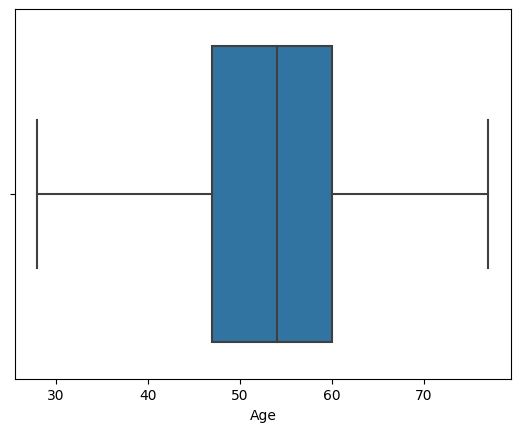

In [ ]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

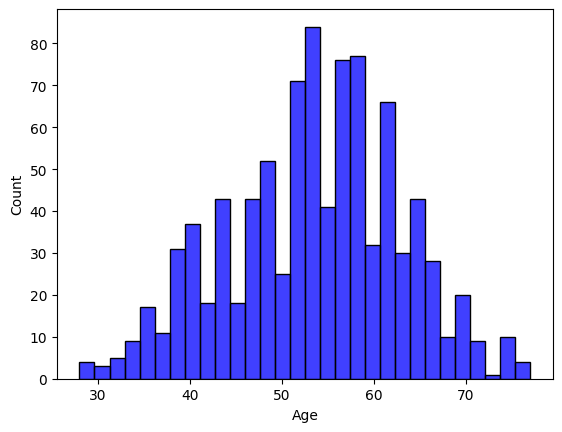

In [ ]:
sns.histplot(x='Age', data = df, bins=30, color='blue')

<Axes: xlabel='RestingBP'>

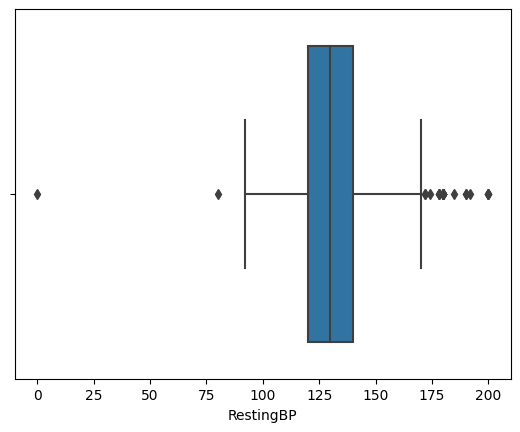

In [ ]:
sns.boxplot(x=df['RestingBP'])

<Axes: xlabel='RestingBP', ylabel='Count'>

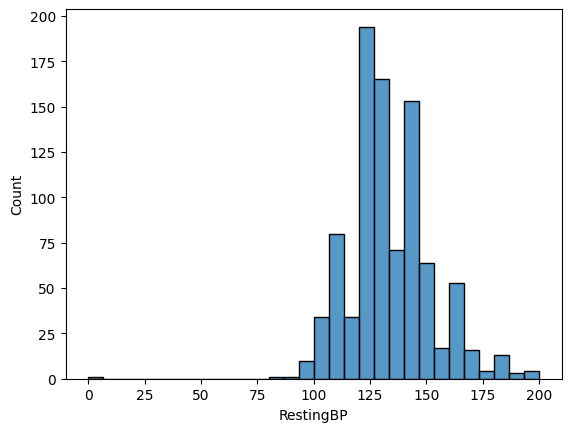

In [ ]:
sns.histplot(x='RestingBP', data = df, bins=30)

In [ ]:
q1 = df['RestingBP'].quantile(0.25)
q3 = df['RestingBP'].quantile(0.75)
iqr = q3 - q1
iqr

20.0

In [ ]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(90.0, 170.0)

In [ ]:
capped_df = df.copy()
capped_df['RestingBP'] = np.where(df['RestingBP'] < lower_limit, lower_limit,
 (np.where(df['RestingBP'] > upper_limit, upper_limit, df['RestingBP']))
 )
capped_df.shape

(918, 12)

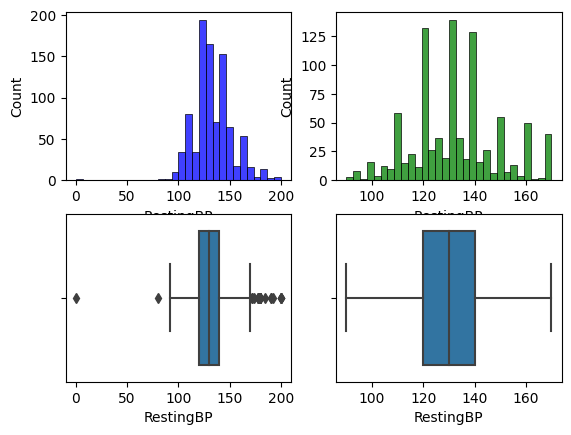

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='RestingBP', data=df, bins=30, color='blue', ax=ax1)
sns.histplot(x='RestingBP', data=capped_df, bins=30, color='green', ax=ax2)
sns.boxplot(x='RestingBP', data=df, ax=ax3)
sns.boxplot(x='RestingBP', data=capped_df, ax=ax4);

<Axes: xlabel='Cholesterol'>

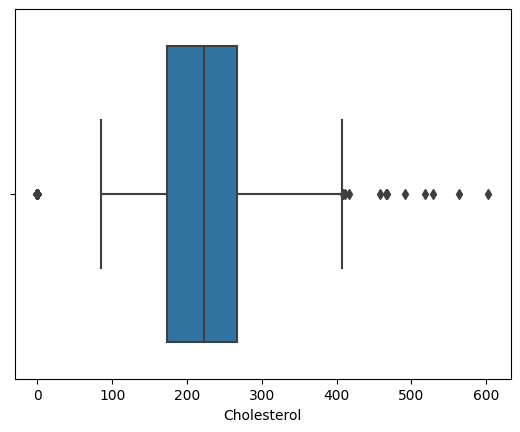

In [ ]:
sns.boxplot(x=df['Cholesterol'])

<Axes: xlabel='Cholesterol', ylabel='Count'>

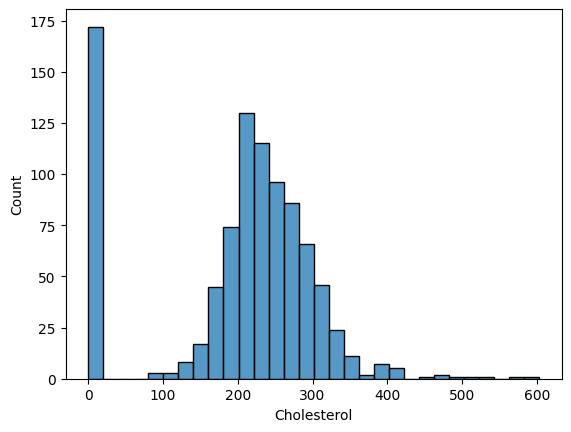

In [ ]:
sns.histplot(x='Cholesterol', data = df, bins=30)

In [ ]:
q1 = df['Cholesterol'].quantile(0.25)
q3 = df['Cholesterol'].quantile(0.75)
iqr = q3 - q1
iqr

93.75

In [ ]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(32.625, 407.625)

In [ ]:
capped_df['Cholesterol'] = np.where(df['Cholesterol'] < lower_limit, lower_limit,
 (np.where(df['Cholesterol'] > upper_limit, upper_limit, df['Cholesterol']))
 )
capped_df.shape

(918, 12)

In [ ]:
capped_df['Cholesterol'] = capped_df['Cholesterol'].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

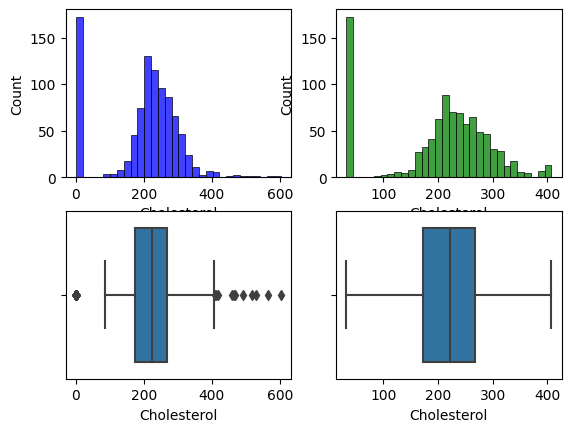

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='Cholesterol', data=df, bins=30, color='blue', ax=ax1)
sns.histplot(x='Cholesterol', data=capped_df, bins=30, color='green', ax=ax2)
sns.boxplot(x='Cholesterol', data=df, ax=ax3)
sns.boxplot(x='Cholesterol', data=capped_df, ax=ax4);

<Axes: xlabel='MaxHR'>

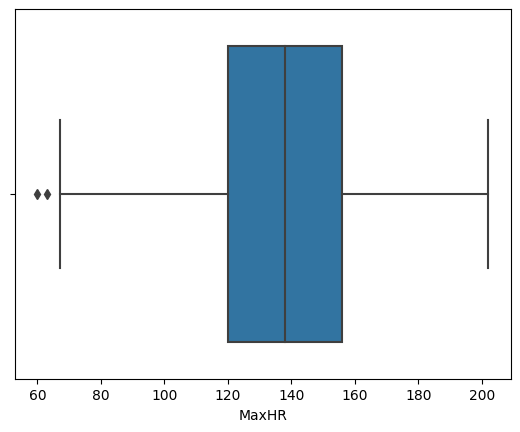

In [ ]:
sns.boxplot(x=df['MaxHR'])

In [ ]:
q1 = df['MaxHR'].quantile(0.25)
q3 = df['MaxHR'].quantile(0.75)
iqr = q3 - q1
iqr

36.0

In [ ]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(66.0, 210.0)

In [ ]:
capped_df['MaxHR'] = np.where(df['MaxHR'] < lower_limit, lower_limit,
 (np.where(df['MaxHR'] > upper_limit, upper_limit, df['MaxHR']))
 )
capped_df.shape

(918, 12)

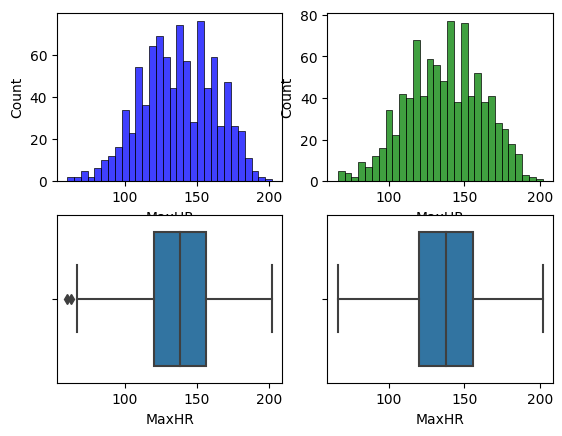

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='MaxHR', data=df, bins=30, color='blue', ax=ax1)
sns.histplot(x='MaxHR', data=capped_df, bins=30, color='green', ax=ax2)
sns.boxplot(x='MaxHR', data=df, ax=ax3)
sns.boxplot(x='MaxHR', data=capped_df, ax=ax4);

<Axes: xlabel='Oldpeak'>

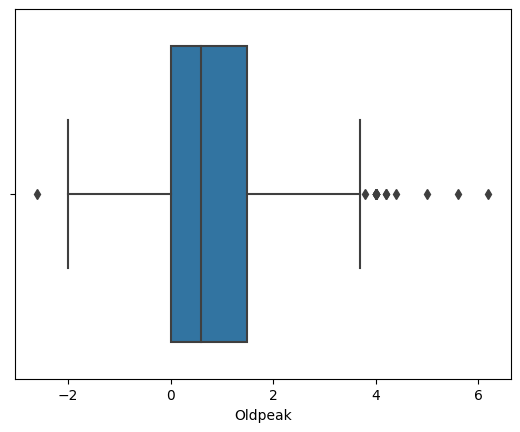

In [ ]:
sns.boxplot(x=df['Oldpeak'])

In [ ]:
q1 = df['Oldpeak'].quantile(0.25)
q3 = df['Oldpeak'].quantile(0.75)
iqr = q3 - q1
iqr

1.5

In [ ]:
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
lower_limit, upper_limit

(-2.25, 3.75)

In [ ]:
capped_df['Oldpeak'] = np.where(df['Oldpeak'] < lower_limit, lower_limit,
 (np.where(df['Oldpeak'] > upper_limit, upper_limit, df['Oldpeak']))
 )
capped_df.shape

(918, 12)

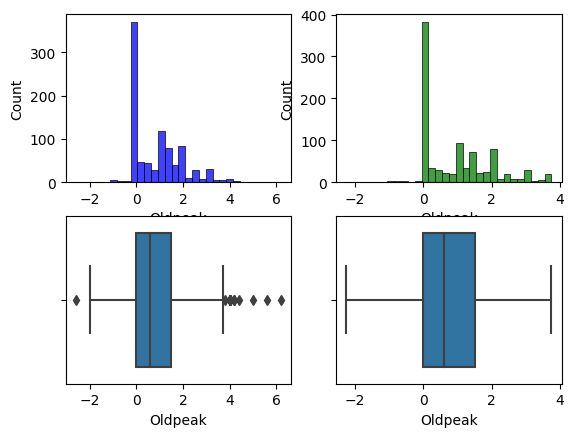

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.histplot(x='Oldpeak', data=df, bins=30, color='blue', ax=ax1)
sns.histplot(x='Oldpeak', data=capped_df, bins=30, color='green', ax=ax2)
sns.boxplot(x='Oldpeak', data=df, ax=ax3)
sns.boxplot(x='Oldpeak', data=capped_df, ax=ax4);

## Train Test Split

In [ ]:
X = capped_df.drop('HeartDisease', axis=1)
y = capped_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

## Encoding Categorical Features

In [ ]:
capped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 86.2+ KB


In [ ]:
#For sex, ExerciseAngina column

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
# For ChestPainType, Resting ECG, ST_Slope

ordinal_encoding_order = {
    'ChestPainType': ['ASY', 'ATA', 'NAP', 'TA'],
    'RestingECG': ['LVH', 'Normal', 'ST'],
    'ST_Slope' : ['Down', 'Flat', 'Up']
}

# Create a pipeline to specify which columns to transform and how to handle missing values

od = Pipeline([
            ('ord_encoder', OrdinalEncoder(categories=[ordinal_encoding_order[col] for col in ['ChestPainType', 'RestingECG', 'ST_Slope']], handle_unknown='use_encoded_value', unknown_value=-1)),

])

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [ ]:
preprocessor = ColumnTransformer(
 transformers=[
 ('categorical', categorical_transformer, [1,8]),
 ('numerical', numeric_transformer, [0,3,4,5,7,9]),
 ('ordinal', od, [2,6,10])
 ]
 )


In [ ]:
model = Pipeline(steps=[
 ('preprocessor', preprocessor),
 ('scaling', StandardScaler()),
 ('regressor', LogisticRegression())
 ])
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [1, 8]),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [0, 3, 4, 5, 7, 9]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['ASY',
                                                                                               'ATA',
                                                                                               'NAP',
                                                                                               'TA'],
                                                                                              ['LVH',
                                                                                               'Normal',
                                                                                               'ST'],
                                                                                              ['Down',
                                                                                               'Flat',
                                                                                               'Up']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [2, 6, 10])])),
                ('scaling', StandardScaler()),
                ('regressor', LogisticRegression())])

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
367,68,M,ASY,135.0,32.625,0,ST,120.0,Y,0.00,Up
848,52,M,ASY,128.0,255.000,0,Normal,161.0,Y,0.00,Up
413,56,M,NAP,125.0,32.625,1,Normal,98.0,N,-2.00,Flat
702,59,M,TA,178.0,270.000,0,LVH,145.0,N,3.75,Down
572,64,M,ASY,150.0,193.000,0,ST,135.0,Y,0.50,Flat
...,...,...,...,...,...,...,...,...,...,...,...
23,44,M,ATA,150.0,288.000,0,Normal,150.0,Y,3.00,Flat
783,45,F,ASY,138.0,236.000,0,LVH,152.0,Y,0.20,Flat
898,35,M,ATA,122.0,192.000,0,Normal,174.0,N,0.00,Up
325,42,M,ASY,105.0,32.625,1,Normal,128.0,Y,-1.50,Down


In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [1, 8]),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  [0, 3, 4, 5, 7, 9]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord_encoder',
                                                                   OrdinalEncoder(categories=[['ASY',
                                                                                               'ATA',
                                                                                               'NAP',
                                                                                               'TA'],
                                                                                              ['LVH',
                                                                                               'Normal',
                                                                                               'ST'],
                                                                                              ['Down',
                                                                                               'Flat',
                                                                                               'Up']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  [2, 6, 10])])),
                ('scaling', StandardScaler()),
                ('regressor', LogisticRegression())])

In [ ]:
model.score(X_test, y_test)

0.8695652173913043

In [ ]:
Age = 42
sex = 'Male'
ChestPainType = 'TA'
RestingBP = '143.0'
Cholesterol = '33.4'
FastingBS = 0
RestingECG = 'Normal'
MaxHR = '123.0'
ExerciseAngina = 'Y'
Oldpeak = '3.0'
ST_Slope = 'Down'

test_input = np.array([[Age, sex,ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope]], dtype='object')
test_input


array([[42, 'Male', 'TA', '143.0', '33.4', 0, 'Normal', '123.0', 'Y',
        '3.0', 'Down']], dtype=object)

In [ ]:
model.predict(test_input)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([1])

## Cross Validation

In [ ]:
cross_val_score(model,X_train, y_train, cv=5, scoring='f1')

array([0.86842105, 0.81761006, 0.8427673 , 0.90243902, 0.82580645])

In [ ]:
cross_val_score(model,X_train, y_train, cv=5, scoring='f1').mean()

0.8514087774250585

## Ensembling

In [ ]:
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaling', StandardScaler()),
    ('classifier', SVC(probability=True))
])

logistic_pipeline = Pipeline(steps=[
 ('preprocessor', preprocessor),
 ('scaling', StandardScaler()),
 ('regressor', LogisticRegression())
 ])


In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('decision_tree', dt_pipeline),
        ('random_forest', rf_pipeline),
        ('svm', svm_pipeline),
        ('logistic', logistic_pipeline)
    ],
    voting='soft'  # You can also use 'hard' voting
)


In [ ]:
ensemble.fit(X_train, y_train)
accuracy = ensemble.score(X_test, y_test)
print(f'Ensemble Accuracy: {accuracy:.2f}')

Ensemble Accuracy: 0.88


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you have trained an ensemble model named 'ensemble' and have test data X_test and y_test
y_pred = ensemble.predict(X_test)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 58  14]
 [  9 103]]


In [ ]:
# Assuming you have trained an ensemble model named 'ensemble' and have test data X_test and y_test
y_pred = ensemble.predict(X_test)
F1_Score = f1_score(y_test, y_pred)
print(f'F1_Score of the ensemble: {F1_Score:.2f}')


F1_Score of the ensemble: 0.90


In [ ]:

y_pred = ensemble.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the ensemble: {accuracy:.2f}')

Accuracy of the ensemble: 0.88


### Saving model

In [ ]:
!pip install joblib

In [ ]:
import joblib

joblib.dump(ensemble, 'ensemble_model.joblib')

['ensemble_model.joblib']

## Deployment

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

# Load your ensemble model
ensemble = joblib.load('ensemble_model.joblib')

# Now 'ensemble' contains your loaded model, and you can use it for predictions

def main():
    st.title("Heart Disease Prediction")

    st.sidebar.header("User Input Features")

    # Create input fields for user to enter feature values
    age = st.sidebar.slider("Age", 29, 77, 53)
    sex = st.sidebar.selectbox("Sex", ("Male", "Female"))
    cp = st.sidebar.slider("Chest Pain Type", ("ASY", "NAP", "ATA", "TA"))
    trestbps = st.sidebar.slider("Resting Blood Pressure", 90, 170, 132)
    Cholesterol = st.sidebar.slider("Cholesterol", 32, 407, 197 )
    fb = st.sidebar.selectbox("FastingBS", 0, 1, 0.2)
    re = st.sidebar.selectbox("RestingECG", ("ST", "Normal", "LVH"))
    mhr = st.sidebar.slider("MaxHR", 66, 210, 137)
    ea = st.sidebar.selectbox("ExerciseAngina", ("Y","N"))
    op = st.sidebar.slide("Oldpeak", -2.25, 3.75, 0.7)
    sts = st.sidebar.selectbox("ST_Slope", ("Up", "Down", "Flat"))



    # Preprocess user input
    # Convert categorical features to one-hot encoding
    sex = 1 if sex == "Male" else 0
    #cp_one_hot = [1 if i == cp else 0 for i in range(4)]  # Assuming 4 possible values for CP
    # Preprocess other features similarly

    user_data = np.array([age, sex] + cp_one_hot + [trestbps, Cholesterol, fb, mhr, op]).reshape(1, -1)

    # Make predictions using the ensemble model
    prediction = ensemble.predict(user_data)

    if st.sidebar.button("Predict"):
        if prediction[0] == 1:
            st.sidebar.success("The model predicts that you may have heart disease.")
        else:
            st.sidebar.success("The model predicts that you may not have heart disease.")

if __name__ == "__main__":
    main()


StreamlitAPIException: ignored

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
367,68,M,ASY,135.0,32.625,0,ST,120.0,Y,0.00,Up
848,52,M,ASY,128.0,255.000,0,Normal,161.0,Y,0.00,Up
413,56,M,NAP,125.0,32.625,1,Normal,98.0,N,-2.00,Flat
702,59,M,TA,170.0,270.000,0,LVH,145.0,N,3.75,Down
572,64,M,ASY,150.0,193.000,0,ST,135.0,Y,0.50,Flat
...,...,...,...,...,...,...,...,...,...,...,...
23,44,M,ATA,150.0,288.000,0,Normal,150.0,Y,3.00,Flat
783,45,F,ASY,138.0,236.000,0,LVH,152.0,Y,0.20,Flat
898,35,M,ATA,122.0,192.000,0,Normal,174.0,N,0.00,Up
325,42,M,ASY,105.0,32.625,1,Normal,128.0,Y,-1.50,Down


In [ ]:
import streamlit as st
import numpy as np
import joblib

# Load your machine learning model
model = joblib.load('ensemble_model.joblib')

st.title("Heart Disease Prediction")

st.sidebar.header("User Input Features")

# Create input fields for user to enter feature values

# Age
age = st.sidebar.slider("Age", 29, 77, 55)

# Sex (0 for Female, 1 for Male)
sex = st.sidebar.selectbox("Sex", ("Female", "Male"))

# Chest Pain Type (0, 1, 2, 3)
cp = st.sidebar.slider("Chest Pain Type (CP)", 0, 3, 0)

# Resting ECG (0, 1, 2)
resting_ecg = st.sidebar.slider("Resting ECG", 0, 2, 0)

# ST Slope (0, 1, 2)
st_slope = st.sidebar.slider("ST Slope", 0, 2, 0)

# Resting Blood Pressure
resting_bp = st.sidebar.slider("Resting Blood Pressure (mm Hg)", 90, 200, 120)

# Cholesterol
cholesterol = st.sidebar.slider("Cholesterol (mg/dl)", 126, 564, 200)

# Fasting Blood Sugar (0 for < 120 mg/dl, 1 for >= 120 mg/dl)
fasting_bp = st.sidebar.selectbox("Fasting Blood Sugar", ("< 120 mg/dl", ">= 120 mg/dl"))

# Max Heart Rate
max_heart_rate = st.sidebar.slider("Max Heart Rate", 71, 202, 150)

# Oldpeak
oldpeak = st.sidebar.slider("Oldpeak", 0.0, 6.2, 1.0)

# Button to make predictions
if st.sidebar.button("Predict"):
    # Preprocess user input (e.g., convert categorical to numeric)
    sex = 1 if sex == "Male" else 0
    fasting_bp = 1 if fasting_bp == ">= 120 mg/dl" else 0

    # Create a feature vector from user input
    feature_vector = np.array([age, sex, cp, resting_ecg, st_slope, resting_bp, cholesterol, fasting_bp, max_heart_rate, oldpeak])

    # Reshape the feature vector for prediction
    feature_vector = feature_vector.reshape(1, -1)

    # Make predictions using your machine learning model
    prediction = model.predict(feature_vector)

    if prediction[0] == 1:
        st.sidebar.success("The model predicts that you may have heart disease.")
    else:
        st.sidebar.success("The model predicts that you may not have heart disease.")



In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import streamlit as st
from flask import Flask, request, jsonify

# Create a Streamlit app
import joblib

# Load your machine learning model
model = joblib.load('ensemble_model.joblib')

st.title("Heart Disease Prediction")

st.sidebar.header("User Input Features")

# Create input fields for user to enter feature values

# Age
age = st.sidebar.slider("Age", 29, 77, 55)

# Sex (0 for Female, 1 for Male)
sex = st.sidebar.selectbox("Sex", ("Female", "Male"))

# Chest Pain Type (0, 1, 2, 3)
cp = st.sidebar.slider("Chest Pain Type (CP)", 0, 3, 0)

# Resting ECG (0, 1, 2)
resting_ecg = st.sidebar.slider("Resting ECG", 0, 2, 0)

# ST Slope (0, 1, 2)
st_slope = st.sidebar.slider("ST Slope", 0, 2, 0)

# Resting Blood Pressure
resting_bp = st.sidebar.slider("Resting Blood Pressure (mm Hg)", 90, 200, 120)

# Cholesterol
cholesterol = st.sidebar.slider("Cholesterol (mg/dl)", 126, 564, 200)

# Fasting Blood Sugar (0 for < 120 mg/dl, 1 for >= 120 mg/dl)
fasting_bp = st.sidebar.selectbox("Fasting Blood Sugar", ("< 120 mg/dl", ">= 120 mg/dl"))

# Max Heart Rate
max_heart_rate = st.sidebar.slider("Max Heart Rate", 71, 202, 150)

# Oldpeak
oldpeak = st.sidebar.slider("Oldpeak", 0.0, 6.2, 1.0)

# Button to make predictions
if st.sidebar.button("Predict"):
    # Preprocess user input (e.g., convert categorical to numeric)
    sex = 1 if sex == "Male" else 0
    fasting_bp = 1 if fasting_bp == ">= 120 mg/dl" else 0

    # Create a feature vector from user input
    feature_vector = np.array([age, sex, cp, resting_ecg, st_slope, resting_bp, cholesterol, fasting_bp, max_heart_rate, oldpeak])

    # Reshape the feature vector for prediction
    feature_vector = feature_vector.reshape(1, -1)

    # Make predictions using your machine learning model
    prediction = model.predict(feature_vector)

    if prediction[0] == 1:
        st.sidebar.success("The model predicts that you may have heart disease.")
    else:
        st.sidebar.success("The model predicts that you may not have heart disease.")


# Define your Streamlit user interface
user_input = st.text_input("Enter a value:")
st.write("You entered:", user_input)

# Create a Gradio interface
def greet(name):
    return "Hello, " + name + "!"

gr.Interface(fn=greet, inputs="text", outputs="text").launch()

# Create a Flask app to host the Gradio interface
app = Flask(__name__)

@app.route("/gradio")
def gradio_interface():
    return gr.Interface(fn=greet, inputs="text", outputs="text").process(request)

if __name__ == "__main__":
    app.run()


2023-11-08 00:02:53.775 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://de2f59efe8e6e2a5fd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
import gradio as gr
import joblib
import numpy as np

# Load your heart disease classification model
# Replace 'your_model.joblib' with the actual path to your saved model
model = joblib.load('ensemble_model.joblib')

# Define a function to make predictions using the model
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Preprocess the input features as needed
    input_features = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

    # Perform any necessary preprocessing on input_features

    # Make a prediction using the model
    prediction = model.predict([input_features])

    # Convert the prediction to a human-readable format
    if prediction[0] == 1:
        result = "You may have heart disease."
    else:
        result = "You may not have heart disease."

    return result

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.input.Number(label="Age"),
        gr.inputs.Radio(label="Sex", choices=["Female", "Male"]),
        gr.inputs.Number(label="Chest Pain Type"),
        gr.inputs.Number(label="Resting Blood Pressure (mm Hg)"),
        gr.inputs.Number(label="Cholesterol (mg/dl)"),
        gr.inputs.Radio(label="Fasting Blood Sugar", choices=["< 120 mg/dl", ">= 120 mg/dl"]),
        gr.inputs.Number(label="Resting ECG"),
        gr.inputs.Number(label="Max Heart Rate"),
        gr.inputs.Radio(label="Exercise-Induced Angina", choices=["No", "Yes"]),
        gr.inputs.Number(label="ST Depression Induced by Exercise Relative to Rest (Oldpeak)"),
        gr.inputs.Number(label="Slope of the Peak Exercise ST Segment"),
        gr.inputs.Number(label="Number of Major Vessels Colored by Fluoroscopy (ca)"),
        gr.inputs.Number(label="Thalassemia")
    ],
    outputs=gr.outputs.Text(label="Prediction")
)

# Launch the Gradio interface
iface.launch()


AttributeError: ignored